In [51]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import datetime

In [63]:
filepath = r"C:\Users\pkayode\Downloads\Assessment Dataset.... (1)\Assessment Dataset.csv"

df = pd.read_csv(filepath)

In [64]:
df.head()

,Customer ID,Recipient,Amount,Tranx_Date,Tranx ID,Updated Time,Buying Price,Transaction Gateway,Seller Name,Vending Channel,Account Type,Location,product,Status
0,8304555449023,0807643XXXX,1650.0,2024-11-24 08:34:03,7222324112408349006592,2024-11-24 08:34:03,1615.0,GTW-3,CS1,Direct,postpaid,UK,data,Successful
1,8304555449023,0808341XXXX,1150.0,2024-11-24 13:37:55,7232124112413371719392,2024-11-24 13:37:56,1132.5,GTW-3,CS1,Direct,postpaid,UK,airtime,Successful
2,8304555449023,0703388XXXX,850.0,2024-11-24 09:02:44,7232424112409020587992,2024-11-24 09:02:45,843.0,GTW-2,CS2,Direct,postpaid,UK,airtime,Successful
3,8304555449023,0806770XXXX,750.0,2024-11-24 20:35:43,7222424112420356982192,2024-11-24 20:35:44,746.5,GTW-2,CS2,Direct,postpaid,UK,airtime,Successful
4,8304555449023,0802066XXXX,850.0,2024-11-24 08:31:21,7222124112408315785092,2024-11-24 08:31:22,843.0,GTW-3,CS1,Direct,postpaid,UK,airtime,Successful


In [65]:
df_no_response_time = df[df['Updated Time'].isna()]


In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 648246 entries, 0 to 648245
Data columns (total 14 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Customer ID          648246 non-null  int64  
 1   Recipient            648246 non-null  object 
 2   Amount               648246 non-null  float64
 3   Tranx_Date           648246 non-null  object 
 4   Tranx ID             648246 non-null  object 
 5   Updated Time         643051 non-null  object 
 6   Buying Price         648246 non-null  float64
 7   Transaction Gateway  648246 non-null  object 
 8   Seller Name          648246 non-null  object 
 9   Vending Channel      648243 non-null  object 
 10  Account Type         648246 non-null  object 
 11  Location             648246 non-null  object 
 12  product              648246 non-null  object 
 13  Status               648246 non-null  object 
dtypes: float64(2), int64(1), object(11)
memory usage: 69.2+ MB


In [67]:
df.isna().sum()

Customer ID               0
Recipient                 0
Amount                    0
Tranx_Date                0
Tranx ID                  0
Updated Time           5195
Buying Price              0
Transaction Gateway       0
Seller Name               0
Vending Channel           3
Account Type              0
Location                  0
product                   0
Status                    0
dtype: int64

In [68]:
df['product'].value_counts()

product
airtime        517315
data           128345
pin              1239
Electricity       855
cabletv           442
startimes          28
electricity        22
Name: count, dtype: int64

In [69]:
df['Location'].value_counts()

Location
Nigeria    506465
UK         128967
Canada      12814
Name: count, dtype: int64

In [70]:
df['Vending Channel'].value_counts()

Vending Channel
Direct         647194
Third Party      1049
Name: count, dtype: int64

In [71]:
df['Status'].value_counts()

Status
Successful                           643456
Other Errors                           2416
Too much requests/System too Busy      1033
Validation Error                        736
Wrong Product                           605
Name: count, dtype: int64

In [72]:
df['Seller Name'].value_counts()

Seller Name
CS1    323817
CS7    241608
CS2     61797
CS3     20040
CS5       587
CS4       350
CS6        47
Name: count, dtype: int64

In [73]:
df[['Status','Amount', 'Buying Price']].groupby('Status').mean(['Amount', 'Buying Price'])

,Amount,Buying Price
Status,,
Other Errors,1924.904069,1894.701767
Successful,1268.858626,1246.981654
Too much requests/System too Busy,2004.660213,1957.776292
Validation Error,1703.158967,1664.673166
Wrong Product,1649.338843,1610.601653


In [74]:
df[['Amount','Buying Price','Location','Account Type','Status']].groupby(['Status','Location','Account Type']).max(['Amount', 'Buying Price'])

Amount  \
Status                            Location Account Type              
Other Errors                      Canada   postpaid        20650.0   
                                           prepaid         50650.0   
                                  Nigeria  postpaid        15650.0   
                                  UK       postpaid       150650.0   
Successful                        Canada   postpaid         8650.0   
                                           prepaid         70650.0   
                                  Nigeria  postpaid      2000650.0   
                                           prepaid           700.0   
                                  UK       postpaid       350650.0   
Too much requests/System too Busy Canada   postpaid         7650.0   
                                           prepaid         10650.0   
                                  Nigeria  postpaid        16650.0   
                                  UK       postpaid        20650.0   
Validation Error                  Canada   prepaid          2150.0   
                                  Nigeria  postpaid        22650.0   
                                  UK       postpaid         8650.0   
Wrong Product                     Canada   prepaid          5650.0   
                                  Nigeria  postpaid        16650.0   
                                  UK       postpaid        10650.0   

                                                         Buying Price  
Status                            Location Account Type                
Other Errors                      Canada   postpaid           20650.0  
                                           prepaid            50400.0  
                                  Nigeria  postpaid           14600.0  
                                  UK       postpaid          149650.0  
Successful                        Canada   postpaid            8650.0  
                                           prepaid            70300.0  
                                  Nigeria  postpaid         1999150.0  
                                           prepaid              700.0  
                                  UK       postpaid          349150.0  
Too much requests/System too Busy Canada   postpaid            7650.0  
                                           prepaid            10250.0  
                                  Nigeria  postpaid           16010.0  
                                  UK       postpaid           19970.0  
Validation Error                  Canada   prepaid             2102.0  
                                  Nigeria  postpaid           21770.0  
                                  UK       postpaid            8378.0  
Wrong Product                     Canada   prepaid             5525.0  
                                  Nigeria  postpaid           15530.0  
                                  UK       postpaid           10320.0

In [75]:
df[['Amount','Buying Price','Location','Account Type','Status']].groupby(['Status','Location','Account Type']).mean(['Amount', 'Buying Price'])

Amount  \
Status                            Location Account Type                
Other Errors                      Canada   postpaid      5676.666667   
                                           prepaid       2580.007373   
                                  Nigeria  postpaid      1179.343624   
                                  UK       postpaid      4172.050000   
Successful                        Canada   postpaid      7900.000000   
                                           prepaid       1373.519568   
                                  Nigeria  postpaid      1221.885800   
                                           prepaid        700.000000   
                                  UK       postpaid      1443.780373   
Too much requests/System too Busy Canada   postpaid      4816.666667   
                                           prepaid       1185.128205   
                                  Nigeria  postpaid      2178.018395   
                                  UK       postpaid      2172.474359   
Validation Error                  Canada   prepaid       1253.846154   
                                  Nigeria  postpaid      1707.385399   
                                  UK       postpaid      1728.171642   
Wrong Product                     Canada   prepaid       1535.000000   
                                  Nigeria  postpaid      2891.217617   
                                  UK       postpaid      1053.562500   

                                                         Buying Price  
Status                            Location Account Type                
Other Errors                      Canada   postpaid       5664.833333  
                                           prepaid        2533.112549  
                                  Nigeria  postpaid       1155.492740  
                                  UK       postpaid       4127.222848  
Successful                        Canada   postpaid       7900.000000  
                                           prepaid        1344.794685  
                                  Nigeria  postpaid       1201.118207  
                                           prepaid         700.000000  
                                  UK       postpaid       1418.191253  
Too much requests/System too Busy Canada   postpaid       4816.666667  
                                           prepaid        1167.301026  
                                  Nigeria  postpaid       2122.914498  
                                  UK       postpaid       2121.180940  
Validation Error                  Canada   prepaid        1234.576923  
                                  Nigeria  postpaid       1668.117487  
                                  UK       postpaid       1691.259328  
Wrong Product                     Canada   prepaid        1512.916667  
                                  Nigeria  postpaid       2798.199482  
                                  UK       postpaid       1040.516250

In [76]:
df['Tranx_Date'] = pd.to_datetime(df['Tranx_Date'], format='%Y-%m-%d %H:%M:%S')
df['Updated Time'] = pd.to_datetime(df['Updated Time'], format='%Y-%m-%d %H:%M:%S')

In [77]:
df_no_response_time['Status'].value_counts()

Status
Successful      4475
Other Errors     720
Name: count, dtype: int64

In [79]:
df_no_response_error = df_no_response_time[df_no_response_time['Status'] == 'Other Errors']

In [80]:
df['response time'] = (df['Updated Time'] - df['Tranx_Date']).dt.seconds
df['response time'].fillna(value=1, inplace=True)

C:\Users\pkayode\AppData\Local\Temp\ipykernel_21736\2148623710.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['response time'].fillna(value=1, inplace=True)


In [81]:
df[['Amount','Buying Price','product']].groupby(['product']).max(['Amount', 'Buying Price'])

,Amount,Buying Price
product,,
Electricity,350650.0,349150.0
airtime,100650.0,97150.0
cabletv,42650.0,42230.0
data,100650.0,97150.0
electricity,2000650.0,1999150.0
pin,10650.0,10450.0
startimes,8850.0,8645.0


In [82]:
df_top_10 = df.sort_values(by=['Amount', 'Buying Price'], ascending=False).head(10)
df_top_10

,Customer ID,Recipient,Amount,Tranx_Date,Tranx ID,Updated Time,Buying Price,Transaction Gateway,Seller Name,Vending Channel,Account Type,Location,product,Status,response time
452644,315468429624,010115045XXXX,2000650.0,2024-11-26 19:40:40,787323173264644092,NaT,1999150.0,GTW-6,CS7,Direct,postpaid,Nigeria,electricity,Successful,1.0
50466,8304555449023,4570085XXXX,350650.0,2024-11-28 12:38:16,72224112812382702792,NaT,349150.0,GTW-6,CS7,Direct,postpaid,UK,Electricity,Successful,1.0
23073,8304555449023,0132163XXXX,300650.0,2024-11-26 18:08:17,72324112618089782692,NaT,299150.0,GTW-6,CS7,Direct,postpaid,UK,Electricity,Successful,1.0
68092,8304555449023,4570191XXXX,300650.0,2024-11-29 23:14:49,72324112923147119192,NaT,299150.0,GTW-6,CS7,Direct,postpaid,UK,Electricity,Successful,1.0
47583,8304555449023,4390180XXXX,250650.0,2024-11-28 17:01:08,72224112817015101292,NaT,249650.0,GTW-6,CS5,Direct,postpaid,UK,Electricity,Successful,1.0
509428,138455421218,010115054XXXX,200650.0,2024-11-27 09:41:18,72324112709415903592,NaT,199650.0,GTW-6,CS7,Direct,postpaid,UK,Electricity,Successful,1.0
56218,8304555449023,4570123XXXX,200650.0,2024-11-28 10:45:10,72324112810452281992,NaT,198050.0,GTW-6,CS7,Direct,postpaid,UK,Electricity,Successful,1.0
637520,312645843913,4514282XXXX,150650.0,2024-11-24 05:44:33,72224112405441937192,NaT,149675.0,GTW-6,CS5,Direct,postpaid,UK,Electricity,Successful,1.0
48444,8304555449023,9280258XXXX,150650.0,2024-11-28 21:37:53,72324112821373944992,NaT,149650.0,GTW-6,CS5,Direct,postpaid,UK,Electricity,Other Errors,1.0
15366,8304555449023,010093XXXX,117650.0,2024-11-25 15:48:54,72324112515486424992,NaT,116650.0,GTW-6,CS5,Direct,postpaid,UK,Electricity,Successful,1.0


In [83]:
# Step 1: Aggregate total spending per customer per product
df_grouped = df.groupby(['product', 'Customer ID'])['Amount'].sum().reset_index()

# Step 2: Find the 10 least performing customers per product
df_least_performing = df_grouped.groupby('product').apply(lambda x: x.nsmallest(10, 'Amount')).reset_index(drop=True)

# Display the result
print(df_least_performing)

        product     Customer ID     Amount
0   Electricity    917000447287      750.0
1   Electricity  33733665459469     1650.0
2   Electricity   3733677491279     3500.0
3   Electricity  33733678463596    10150.0
4   Electricity   7315606457522    33550.0
5   Electricity  83733676454855    61950.0
6   Electricity   2711999437214   250200.0
7   Electricity   1315619422232   333550.0
8   Electricity    312645843913   857850.0
9   Electricity    138455421218  1584720.0
10      airtime  53733683488385      750.0
11      airtime    638422451183      950.0
12      airtime   2326019439095     1150.0
13      airtime   3733625420153     1650.0
14      airtime  33733665459469     1900.0
15      airtime  33733675434772     2750.0
16      airtime   3122784473224     2890.0
17      airtime  93733693420416     3150.0
18      airtime   1733499421416     4150.0
19      airtime    416404425437     4650.0
20      cabletv    917000447287     1400.0
21      cabletv   2711999437214     3950.0
22      cab

C:\Users\pkayode\AppData\Local\Temp\ipykernel_21736\913401572.py:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_least_performing = df_grouped.groupby('product').apply(lambda x: x.nsmallest(10, 'Amount')).reset_index(drop=True)


In [84]:
# Step 1: Identify Top 5 Customers by Total Spending
top_5_customers = df.groupby('Customer ID')['Amount'].sum().nlargest(5).index

In [85]:
# Step 2: Filter Data for Only the Top 5 Customers
df_top_5 = df[df['Customer ID'].isin(top_5_customers)]

In [86]:
df_trend = df_top_5.groupby(['Tranx_Date', 'Customer ID'])['Amount'].sum().unstack(fill_value=0)


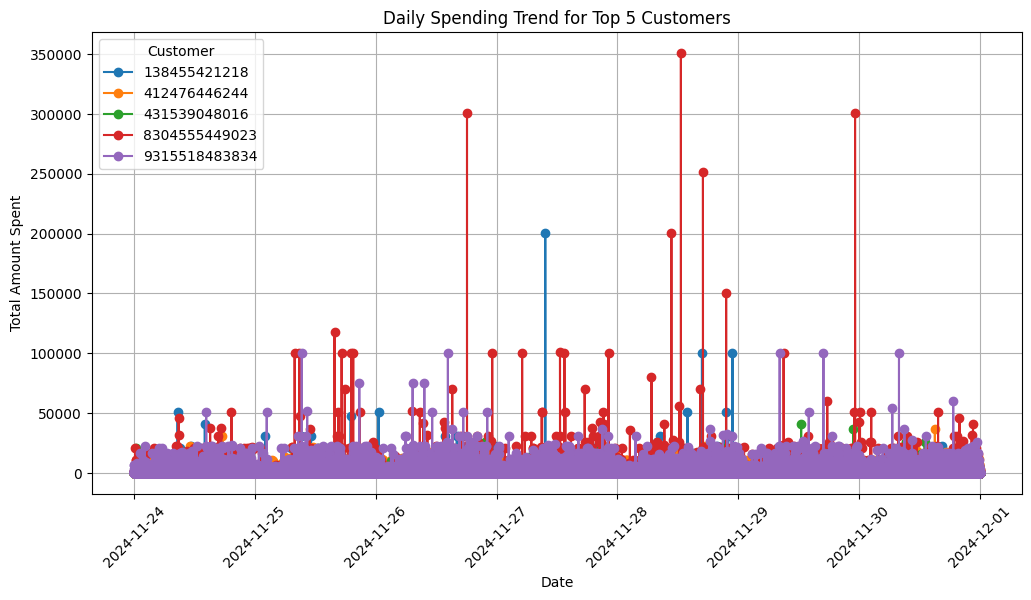

In [87]:
# Step 4: Plot the Trend Chart
plt.figure(figsize=(12, 6))
for customer in df_trend.columns:
    plt.plot(df_trend.index, df_trend[customer], marker='o', label=customer)

plt.title("Daily Spending Trend for Top 5 Customers")
plt.xlabel("Date")
plt.ylabel("Total Amount Spent")
plt.xticks(rotation=45)
plt.legend(title="Customer")
plt.grid(True)
plt.show()

In [89]:
df[['product','response time']].groupby('product').mean('response time')

,response time
product,
Electricity,1.000000
airtime,0.849716
cabletv,1.000000
data,1.272032
electricity,1.000000
pin,0.036320
startimes,1.000000
